In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
mpg = pd.read_csv('Data/auto-mpg.csv', usecols = ['horsepower', 'weight', 'mpg'],sep=';')
print(mpg.shape)
#print(mpg.head())
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(mpg[['horsepower', 'weight', 'mpg']], mpg[['mpg']], test_size=0.1, random_state=1)

from sklearn import preprocessing
X_train_norm = preprocessing.normalize(X_train, axis=0)
X_test_norm = preprocessing.normalize(X_test, axis=0)
X_train_norm=X_train
print('X_train_norm',len(X_train_norm))

from sklearn.cluster import KMeans
kmeans1 = KMeans(n_clusters = 3, random_state = 0, n_init=3)
kmeans1.fit(X_train[['horsepower']])
labels1=kmeans1.predict(X_train[['horsepower']])

kmeans2 = KMeans(n_clusters = 3, random_state = 0, n_init=3)
kmeans2.fit(X_train[['weight']])
labels2=kmeans2.predict(X_train[['weight']])

dflabels1=pd.DataFrame(labels1, columns=['class1'])
dflabels2=pd.DataFrame(labels2, columns=['class2'])

(392, 3)
X_train_norm 352


<Axes: ylabel='mpg'>

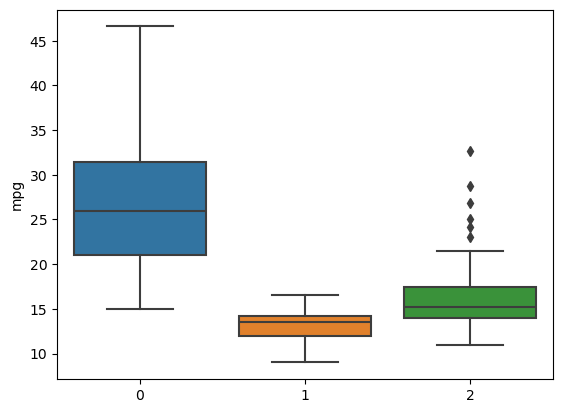

In [2]:
import seaborn as sns
sns.boxplot(x = labels1, y = y_train['mpg'])

<Axes: ylabel='mpg'>

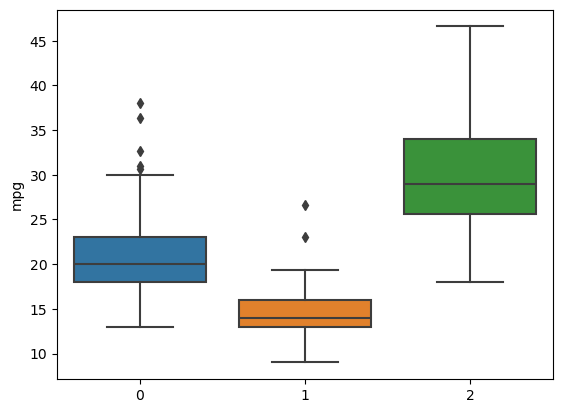

In [3]:
sns.boxplot(x = labels2, y = y_train['mpg'])

In [4]:
#X_train=pd.concat([train_sp, X_train.reset_index(drop=True, inplace=True)], axis=1)
df=pd.concat([X_train.reset_index(), dflabels1.reset_index(), dflabels2], axis=1)
df
#sns.scatterplot(data = df, x = 'class', y='Price')
#df[['Price','class']]
#sns.boxplot(x = df['class'], y = df['Price'])

,index,horsepower,weight,mpg,index,class1,class2
0,229,88,2605,28.0,0,0,2
1,62,142,4054,15.5,1,2,1
2,122,133,3410,16.2,2,2,0
3,125,90,3381,19.1,3,0,0
4,106,98,3525,18.5,4,0,0
...,...,...,...,...,...,...,...
347,203,88,2740,24.5,347,0,0
348,255,90,2430,24.0,348,0,2
349,72,150,3892,15.0,349,2,1
350,235,91,2582,20.0,350,0,2


In [5]:
k=max(df['class1'])+1
print('horsepower')
for i in range(k):
    dfi=df['horsepower'][df['class1']==i]
    print(f'{i+1},  {dfi.mean():.0f}')
print('weight')
for i in range(k):
    dfi=df['weight'][df['class2']==i]
    print(f'{i+1},  {dfi.mean():.0f}')

horsepower
1,  84
2,  198
3,  143
weight
1,  3163
2,  4236
3,  2217


In [6]:
#X_train
#df['class']
k=max(df['class1'])+1
print('Classes ij')
for i in range(k):
    for j in range(k):
        dfij=df['mpg'][(df['class1']==i) & (df['class2']==j)]
        print(f'{i+1}{j+1},  {dfij.mean():.0f}')

Classes ij
11,  21
12,  18
13,  30
21,  14
22,  13
23,  nan
31,  18
32,  15
33,  27


In [7]:
X_train_norm = preprocessing.normalize(X_train, axis=0)